In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


Using device=mps
middle-C=261.63 Hz
complex=tensor([[0.3535+0.7632j, 0.0244+0.9399j, 0.3257+0.7686j],
        [0.0049+0.4370j, 0.6382+0.0332j, 0.4204+0.2656j],
        [0.9053+0.6030j, 0.7974+0.2783j, 0.3896+0.7344j],
        [0.8081+0.8862j, 0.9521+0.4771j, 0.4175+0.4814j],
        [0.3447+0.8833j, 0.8257+0.4731j, 0.1509+0.9302j]],
       dtype=torch.complex32)
amplitudes=tensor([[0.8413, 0.9404, 0.8345],
        [0.4370, 0.6392, 0.4973],
        [1.0879, 0.8447, 0.8315],
        [1.1992, 1.0654, 0.6372],
        [0.9482, 0.9517, 0.9424]], dtype=torch.float16)
decode=tensor([[0.8413+0.j, 0.9404+0.j, 0.8345+0.j],
        [0.4370+0.j, 0.6392+0.j, 0.4973+0.j],
        [1.0879+0.j, 0.8447+0.j, 0.8315+0.j],
        [1.1992+0.j, 1.0654+0.j, 0.6372+0.j],
        [0.9482+0.j, 0.9517+0.j, 0.9424+0.j]], dtype=torch.complex32)
recode=tensor([[0.8413, 0.9404, 0.8345],
        [0.4370, 0.6392, 0.4973],
        [1.0879, 0.8447, 0.8315],
        [1.1992, 1.0654, 0.6372],
        [0.9482, 0.9517, 0.9

/Users/Richard/Coding/SampleGen/AudioUtils.py:258: UserWarning: ComplexHalf support is experimental and many operators don't support it yet. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/EmptyTensor.cpp:32.)
  complex = torch.rand(5, 3, dtype=torch.complex32)
/Users/Richard/Coding/SampleGen/AudioUtils.py:72: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, data = wavfile.read(file_name)


truncated = numpy.ndarray(1025, 57) x complex64, size=58,425 elements = 467,400 bytes
original max=273.81


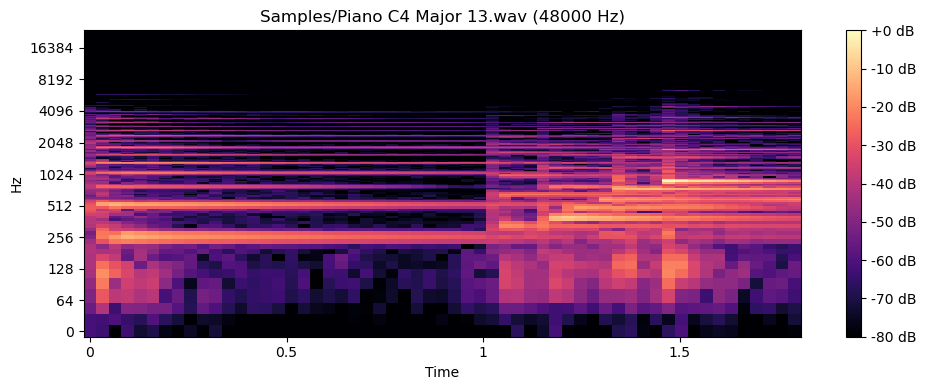

original = Torch.Tensor[1025, 57] x torch.complex64, size=58,425 elements = 467,400 bytes, device=cpu
input = Torch.Tensor[1025, 57] x torch.float32, size=58,425 elements = 233,700 bytes, device=mps:0
input: min=0.00000, max=1.00000
output = numpy.ndarray(1025, 57) x complex64, size=58,425 elements = 467,400 bytes
output: min=0.00000, max=278.00000+0.00000j


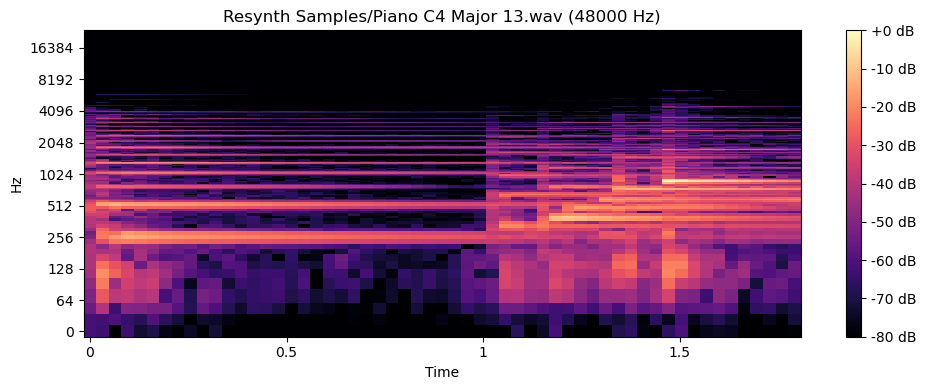

diff = numpy.ndarray(1025, 57) x float32, size=58,425 elements = 233,700 bytes


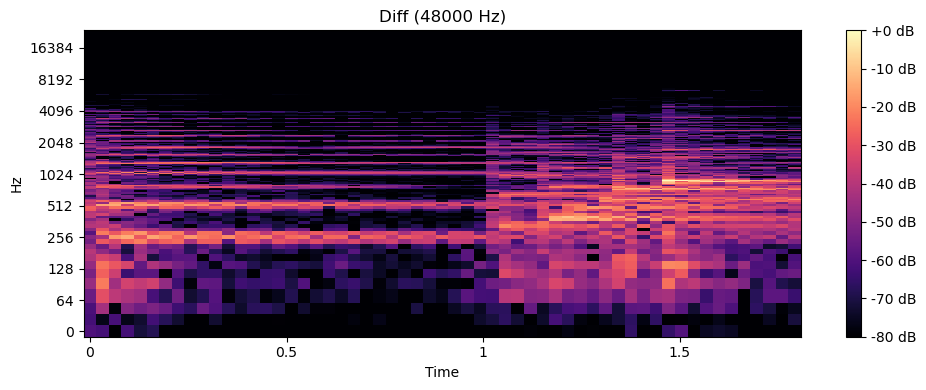

1 sample = 1,025 x 57 = 58,425


In [2]:
from HyperParameterTuning import *


# from MakeSTFTs import *
# from Train import *
# from AudioUtils import *

# Load a demo sample, convert to STFT and back and play the sound.
#demo_stft("Samples/Piano C4 Major 13.wav", 2048, 2048*3//4)

In [3]:
# Read all available samples and convert to STFTs
# This only needs to be done if the samples change or we change parameters such as the STFT size or the sample duration.

#make_STFTs()
#stop()

Loaded 1017 STFTs from STFTs.pkl
1017 STFTs
Using train=813 samples, test=204 samples.
MLP_VAE: stored params=[4, 5e-05, 48, 1, 0.5, 6, 3, 1.42]
optimiser: Adam batch=28, learning_rate=5e-05, weight_decay=0
MLP_VAE hidden=48, depth=1, ratio=0.5, latent=6, VAE depth=3, VAE ratio=1.42
VAE layers=[2736, 2162, 1200, 6]
MLP=1,200,371, VAE=17,050,336, approx total=18,250,707
StepWiseMLPAutoEncoder 1,200,371 parameters, compression=21.4
VariationalAutoEncoder: layers=[2736, 2162, 1200, 6], parameters=17,050,336, compression=456.0
CombinedVAE 18,250,707 parameters, compression=456.0
model=CombinedVAE(
  (auto_encoder): StepWiseMLPAutoEncoder(
    (encoder): Sequential(
      (0): Linear(in_features=2051, out_features=48, bias=True)
    )
    (decoder): Sequential(
      (0): Linear(in_features=1074, out_features=1025, bias=True)
    )
  )
  (vae): VariationalAutoEncoder(
    (encoder_layers): Sequential(
      (0): Linear(in_features=2736, out_features=2162, bias=True)
      (1): ReLU()
      

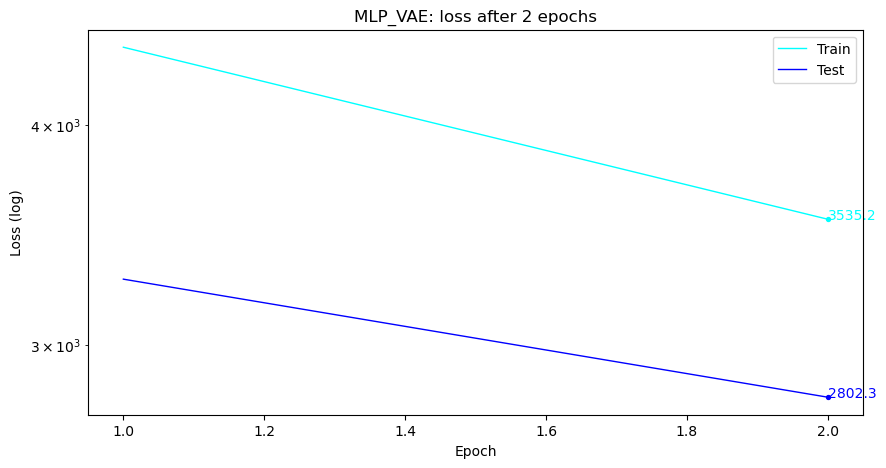

total=9 sec, epoch=3 (3.0 sec/epoch), train=3003.6263 (-15.04%), test=2433.9929 (-13.14%), overfit=0.81


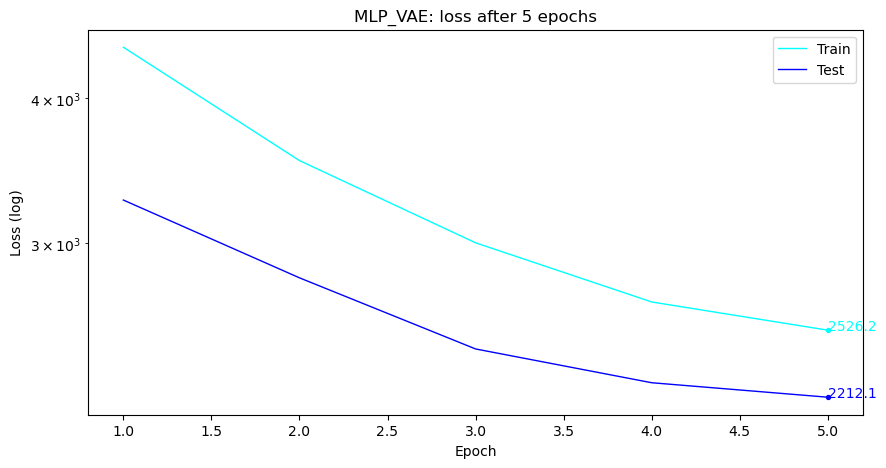

total=14 sec, epoch=5 (2.9 sec/epoch), train=2526.1897 (-5.44%), test=2212.0547 (-2.83%), overfit=0.88
total=20 sec, epoch=7 (2.9 sec/epoch), train=2364.9592 (-2.89%), test=2125.1670 (-1.10%), overfit=0.90


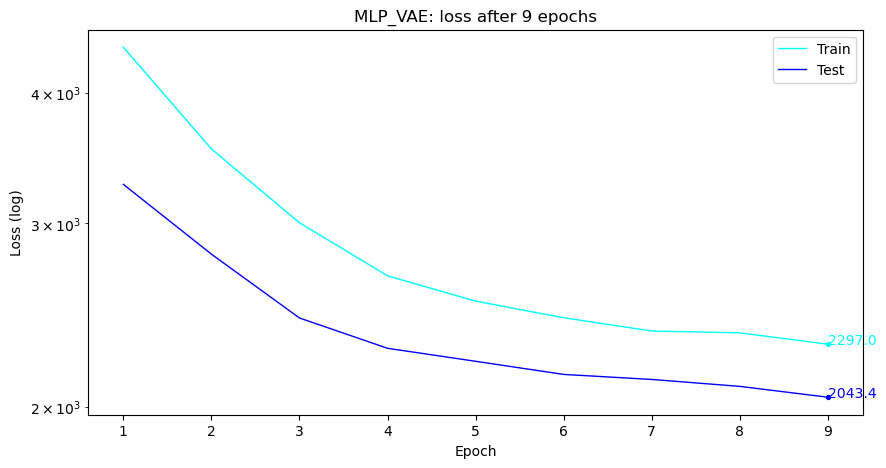

total=25 sec, epoch=9 (2.8 sec/epoch), train=2297.0372 (-2.48%), test=2043.3595 (-2.37%), overfit=0.89
total=31 sec, epoch=11 (2.8 sec/epoch), train=2243.4192 (-0.86%), test=2005.7407 (-0.56%), overfit=0.89
total=36 sec, epoch=13 (2.8 sec/epoch), train=2217.0370 (-0.58%), test=1977.9460 (-0.87%), overfit=0.89


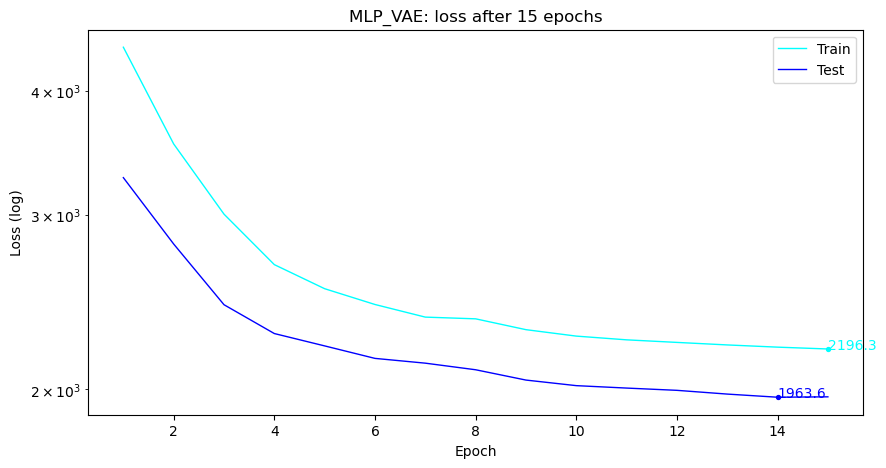

total=42 sec, epoch=15 (2.8 sec/epoch), train=2196.2960 (-0.43%), test=1965.3741 (0.09%), overfit=0.89
total=47 sec, epoch=17 (2.8 sec/epoch), train=2181.8137 (-0.18%), test=1949.8478 (-0.11%), overfit=0.89
total=53 sec, epoch=19 (2.8 sec/epoch), train=2162.3486 (-0.40%), test=1938.4185 (-0.28%), overfit=0.90
total=58 sec, epoch=21 (2.8 sec/epoch), train=2152.4204 (-0.55%), test=1926.3083 (-0.08%), overfit=0.89
total=63 sec, epoch=23 (2.8 sec/epoch), train=2125.4127 (-1.08%), test=1913.9528 (-0.49%), overfit=0.90


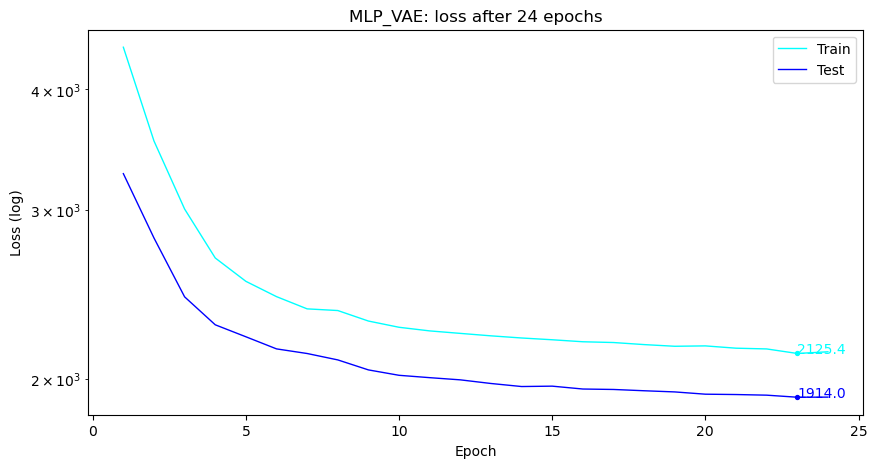

total=69 sec, epoch=25 (2.8 sec/epoch), train=2134.5100 (0.03%), test=1919.2038 (0.25%), overfit=0.90
total=74 sec, epoch=27 (2.8 sec/epoch), train=2123.4984 (-0.28%), test=1903.2150 (-0.52%), overfit=0.90
total=80 sec, epoch=29 (2.7 sec/epoch), train=2113.0178 (-0.03%), test=1899.6806 (0.05%), overfit=0.90
total=85 sec, epoch=31 (2.7 sec/epoch), train=2098.2583 (-0.54%), test=1904.5018 (-0.04%), overfit=0.91
total=91 sec, epoch=33 (2.7 sec/epoch), train=2090.8572 (-0.54%), test=1889.6423 (-0.67%), overfit=0.90
total=96 sec, epoch=35 (2.7 sec/epoch), train=2069.0342 (-0.60%), test=1888.5651 (-0.71%), overfit=0.91


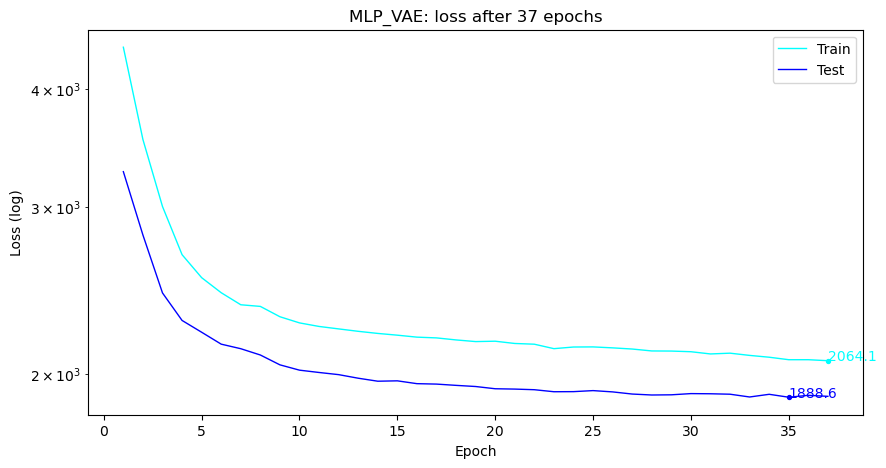

total=101 sec, epoch=37 (2.7 sec/epoch), train=2064.0533 (-0.24%), test=1892.6982 (-0.24%), overfit=0.92
total=107 sec, epoch=39 (2.7 sec/epoch), train=2035.3354 (-0.55%), test=1861.2309 (-0.80%), overfit=0.91
total=112 sec, epoch=41 (2.7 sec/epoch), train=1976.8890 (-1.30%), test=1824.7754 (-0.86%), overfit=0.92
total=118 sec, epoch=43 (2.7 sec/epoch), train=1917.5701 (-1.58%), test=1733.3050 (-2.67%), overfit=0.90
total=123 sec, epoch=45 (2.7 sec/epoch), train=1813.4147 (-2.49%), test=1628.0780 (-3.43%), overfit=0.90
total=129 sec, epoch=47 (2.7 sec/epoch), train=1733.2120 (-2.08%), test=1554.2386 (-2.17%), overfit=0.90
total=134 sec, epoch=49 (2.7 sec/epoch), train=1683.9220 (-1.23%), test=1497.4205 (-1.77%), overfit=0.89
total=140 sec, epoch=51 (2.7 sec/epoch), train=1643.2567 (-0.86%), test=1441.4239 (-2.08%), overfit=0.88
total=145 sec, epoch=53 (2.7 sec/epoch), train=1600.6871 (-1.46%), test=1422.4636 (-1.11%), overfit=0.89


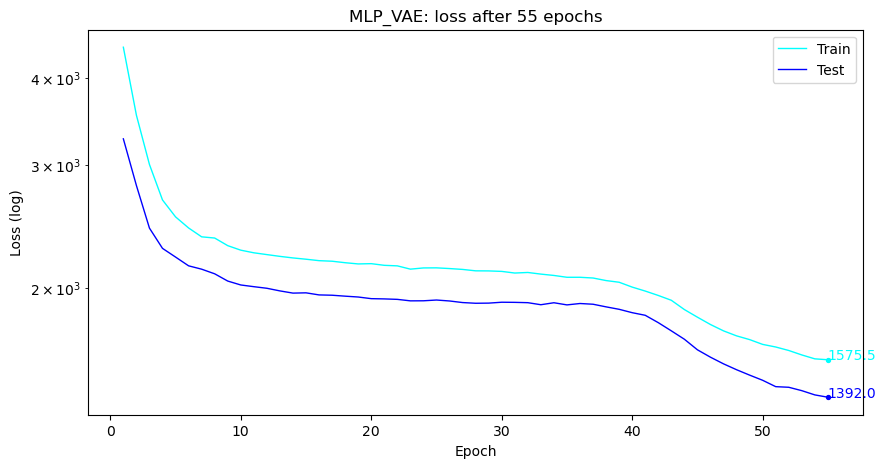

total=151 sec, epoch=55 (2.7 sec/epoch), train=1575.4511 (-0.30%), test=1391.9565 (-0.76%), overfit=0.88
total=156 sec, epoch=57 (2.7 sec/epoch), train=1543.0814 (-1.19%), test=1367.5411 (-0.92%), overfit=0.89
total=162 sec, epoch=59 (2.7 sec/epoch), train=1516.6663 (-0.72%), test=1342.3383 (-1.90%), overfit=0.89
total=167 sec, epoch=61 (2.7 sec/epoch), train=1499.8094 (-0.61%), test=1324.2526 (-1.88%), overfit=0.88
total=173 sec, epoch=63 (2.7 sec/epoch), train=1480.6356 (-0.13%), test=1316.0222 (0.49%), overfit=0.89
total=179 sec, epoch=65 (2.7 sec/epoch), train=1473.6578 (-0.08%), test=1307.7870 (-0.34%), overfit=0.89
total=184 sec, epoch=67 (2.7 sec/epoch), train=1448.5713 (-0.88%), test=1304.0082 (0.56%), overfit=0.90
total=190 sec, epoch=69 (2.7 sec/epoch), train=1444.6015 (-0.11%), test=1282.0835 (0.06%), overfit=0.89
total=195 sec, epoch=71 (2.7 sec/epoch), train=1431.9292 (-0.43%), test=1275.0206 (-0.86%), overfit=0.89
*** Best! loss=1420.35
MLP_VAE hidden=48, depth=1, ratio=0

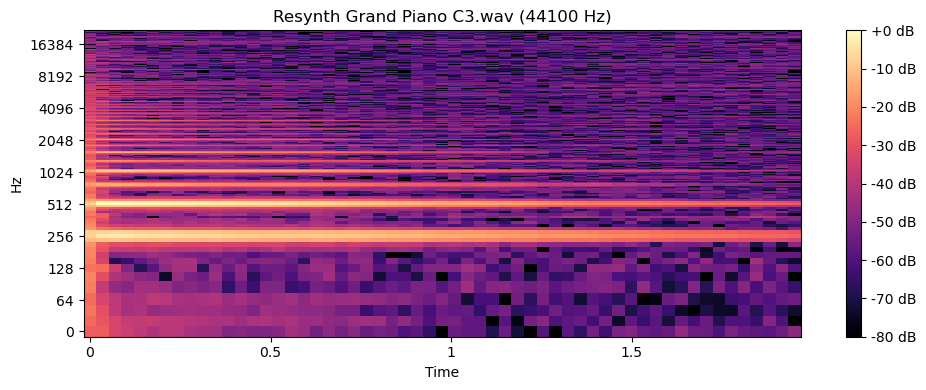

total=201 sec, epoch=73 (2.7 sec/epoch), train=1420.3550 (-1.08%), test=1267.3518 (-0.36%), overfit=0.89
total=206 sec, epoch=75 (2.8 sec/epoch), train=1411.3318 (-0.54%), test=1261.9081 (-1.59%), overfit=0.89
total=212 sec, epoch=77 (2.8 sec/epoch), train=1401.9998 (-0.64%), test=1264.3350 (0.84%), overfit=0.90
total=217 sec, epoch=79 (2.8 sec/epoch), train=1396.3799 (-0.41%), test=1259.6451 (0.21%), overfit=0.90
total=223 sec, epoch=81 (2.8 sec/epoch), train=1396.8988 (-0.02%), test=1252.1837 (-0.64%), overfit=0.90


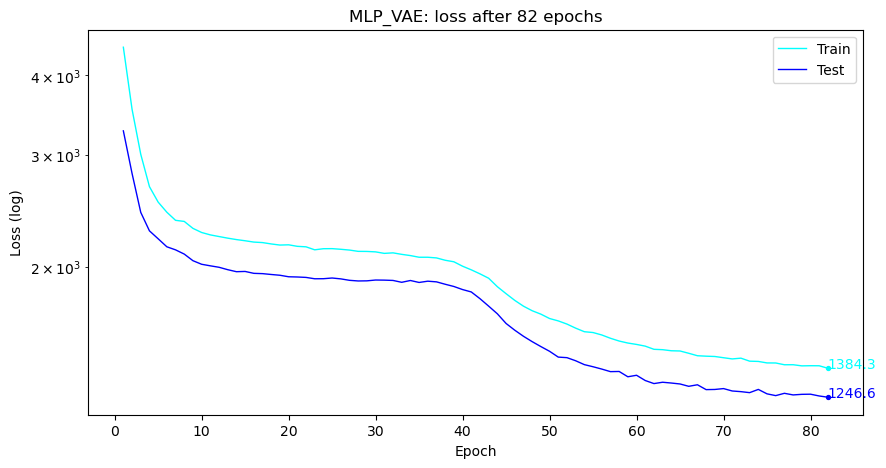

total=229 sec, epoch=83 (2.8 sec/epoch), train=1384.6989 (0.03%), test=1247.2303 (0.05%), overfit=0.90
total=234 sec, epoch=85 (2.8 sec/epoch), train=1374.1155 (-0.47%), test=1249.6287 (-0.52%), overfit=0.91
total=240 sec, epoch=87 (2.8 sec/epoch), train=1376.3292 (0.17%), test=1249.6787 (-0.11%), overfit=0.91
total=245 sec, epoch=89 (2.8 sec/epoch), train=1367.3608 (-0.37%), test=1242.1975 (-0.17%), overfit=0.91
total=251 sec, epoch=91 (2.8 sec/epoch), train=1360.6558 (-0.19%), test=1246.4099 (-0.97%), overfit=0.92
total=256 sec, epoch=93 (2.8 sec/epoch), train=1354.8533 (-0.03%), test=1232.7307 (-1.25%), overfit=0.91
total=262 sec, epoch=95 (2.8 sec/epoch), train=1349.3833 (-0.22%), test=1227.6950 (-0.57%), overfit=0.91
*** Best! loss=1344.68
MLP_VAE hidden=48, depth=1, ratio=0.5, latent=6, VAE depth=3, VAE ratio=1.42 (params=18,250,707, trainable=18,250,707 = 100.0%)
Adam batch=28, learning_rate=5e-05, weight_decay=0
hyper-parameters: [4, 5e-05, 48, 1, 0.5, 6, 3, 1.42]


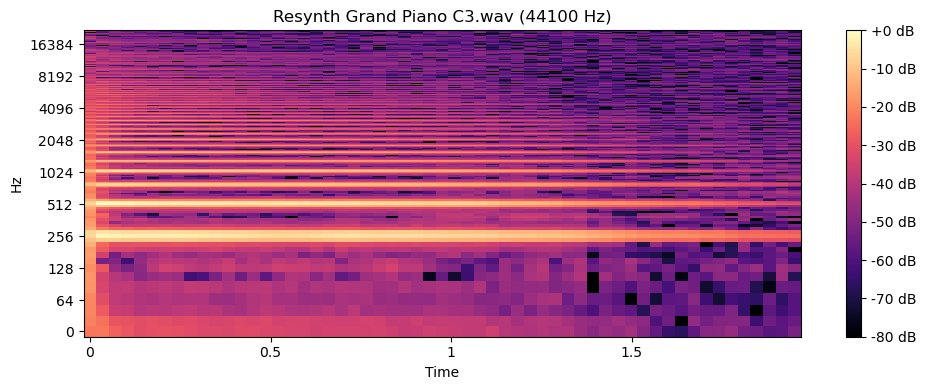

total=267 sec, epoch=97 (2.8 sec/epoch), train=1342.0083 (-0.20%), test=1231.1297 (-0.91%), overfit=0.92
total=273 sec, epoch=99 (2.8 sec/epoch), train=1340.7616 (-0.23%), test=1235.0185 (-0.47%), overfit=0.92
total=279 sec, epoch=101 (2.8 sec/epoch), train=1332.0190 (0.06%), test=1225.4158 (-0.19%), overfit=0.92
total=284 sec, epoch=103 (2.8 sec/epoch), train=1326.8819 (-0.48%), test=1241.3678 (1.31%), overfit=0.94
total=290 sec, epoch=105 (2.8 sec/epoch), train=1320.4144 (-0.51%), test=1227.1057 (-0.61%), overfit=0.93
total=295 sec, epoch=107 (2.8 sec/epoch), train=1314.9229 (-0.28%), test=1224.4892 (0.24%), overfit=0.93
total=301 sec, epoch=109 (2.8 sec/epoch), train=1319.1645 (0.29%), test=1236.9239 (0.56%), overfit=0.94
total=306 sec, epoch=111 (2.8 sec/epoch), train=1314.6344 (0.50%), test=1228.6610 (-0.75%), overfit=0.93
total=312 sec, epoch=113 (2.8 sec/epoch), train=1305.2768 (-0.17%), test=1228.0976 (0.47%), overfit=0.94
total=317 sec, epoch=115 (2.8 sec/epoch), train=1297.47

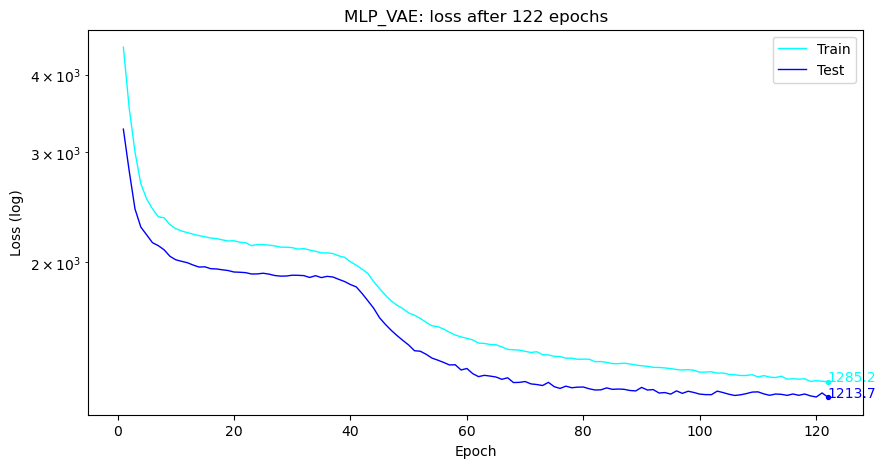

total=339 sec, epoch=123 (2.8 sec/epoch), train=1282.4507 (-0.21%), test=1218.1094 (0.37%), overfit=0.95
total=345 sec, epoch=125 (2.8 sec/epoch), train=1281.5080 (0.30%), test=1223.2499 (0.08%), overfit=0.95
*** Best! loss=1270.68
MLP_VAE hidden=48, depth=1, ratio=0.5, latent=6, VAE depth=3, VAE ratio=1.42 (params=18,250,707, trainable=18,250,707 = 100.0%)
Adam batch=28, learning_rate=5e-05, weight_decay=0
hyper-parameters: [4, 5e-05, 48, 1, 0.5, 6, 3, 1.42]


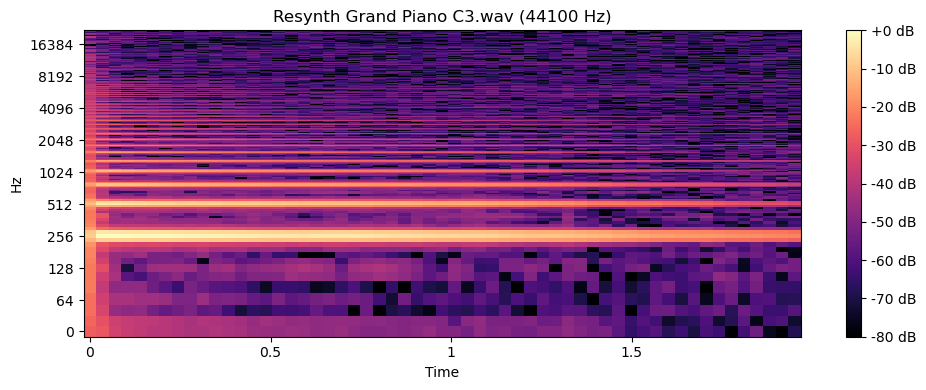

total=351 sec, epoch=127 (2.8 sec/epoch), train=1271.6868 (0.08%), test=1227.3043 (0.66%), overfit=0.97
total=356 sec, epoch=129 (2.8 sec/epoch), train=1273.6857 (-0.49%), test=1222.5890 (-0.42%), overfit=0.96
total=362 sec, epoch=131 (2.8 sec/epoch), train=1266.4638 (-0.21%), test=1209.9037 (-0.40%), overfit=0.96
total=367 sec, epoch=133 (2.8 sec/epoch), train=1260.3796 (-0.03%), test=1212.5745 (-0.90%), overfit=0.96
total=373 sec, epoch=135 (2.8 sec/epoch), train=1256.6985 (-0.25%), test=1216.2397 (1.04%), overfit=0.97
total=378 sec, epoch=137 (2.8 sec/epoch), train=1254.4752 (0.18%), test=1218.5822 (-0.28%), overfit=0.97
total=384 sec, epoch=139 (2.8 sec/epoch), train=1252.6419 (0.37%), test=1212.8873 (-0.02%), overfit=0.97
total=390 sec, epoch=141 (2.8 sec/epoch), train=1253.3447 (0.64%), test=1210.9763 (-0.63%), overfit=0.97
total=395 sec, epoch=143 (2.8 sec/epoch), train=1240.9279 (-0.20%), test=1222.2820 (0.01%), overfit=0.98
total=401 sec, epoch=145 (2.8 sec/epoch), train=1243.

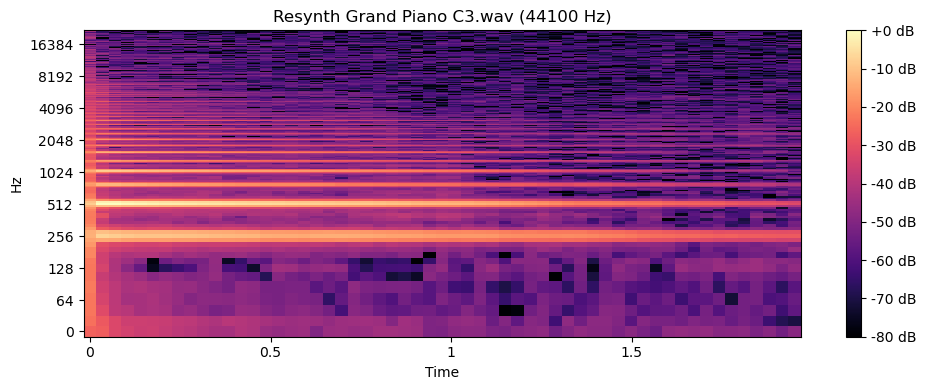

total=456 sec, epoch=165 (2.8 sec/epoch), train=1211.3102 (0.43%), test=1222.4797 (0.07%), overfit=1.01
total=461 sec, epoch=167 (2.8 sec/epoch), train=1207.2236 (-0.61%), test=1201.5606 (-1.02%), overfit=1.00
total=467 sec, epoch=169 (2.8 sec/epoch), train=1202.3312 (-0.39%), test=1209.2568 (0.35%), overfit=1.01
total=472 sec, epoch=171 (2.8 sec/epoch), train=1198.8893 (-0.63%), test=1221.9470 (-0.02%), overfit=1.02
total=478 sec, epoch=173 (2.8 sec/epoch), train=1194.7894 (-0.49%), test=1217.7334 (0.93%), overfit=1.02
total=483 sec, epoch=175 (2.8 sec/epoch), train=1193.6483 (0.34%), test=1196.4404 (-0.78%), overfit=1.00
total=489 sec, epoch=177 (2.8 sec/epoch), train=1188.5530 (-0.41%), test=1223.3088 (0.40%), overfit=1.03
total=494 sec, epoch=179 (2.8 sec/epoch), train=1187.4401 (-0.21%), test=1227.0169 (1.30%), overfit=1.03


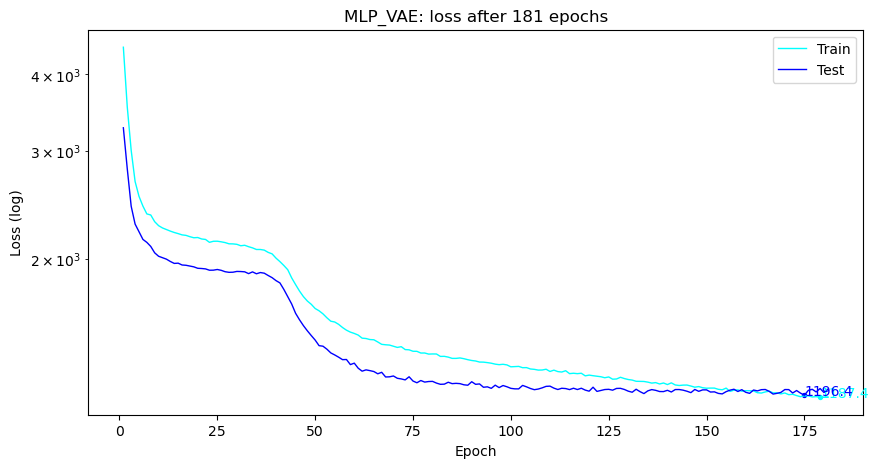

total=500 sec, epoch=181 (2.8 sec/epoch), train=1188.5931 (0.09%), test=1224.2741 (1.32%), overfit=1.03
total=505 sec, epoch=183 (2.8 sec/epoch), train=1182.2386 (-0.05%), test=1215.5479 (0.13%), overfit=1.03
total=511 sec, epoch=185 (2.8 sec/epoch), train=1188.4045 (0.31%), test=1227.1749 (0.93%), overfit=1.03
total=517 sec, epoch=187 (2.8 sec/epoch), train=1175.5590 (-0.70%), test=1217.2929 (-0.07%), overfit=1.04
total=522 sec, epoch=189 (2.8 sec/epoch), train=1173.8567 (-0.57%), test=1224.4587 (0.32%), overfit=1.04
total=528 sec, epoch=191 (2.8 sec/epoch), train=1174.4254 (0.06%), test=1217.6210 (0.60%), overfit=1.04
total=533 sec, epoch=193 (2.8 sec/epoch), train=1169.0101 (-0.53%), test=1218.5519 (-0.65%), overfit=1.04
total=539 sec, epoch=195 (2.8 sec/epoch), train=1172.3500 (0.33%), test=1211.8439 (-0.22%), overfit=1.03
total=544 sec, epoch=197 (2.8 sec/epoch), train=1156.7069 (-0.68%), test=1216.7700 (-0.32%), overfit=1.05
total=550 sec, epoch=199 (2.8 sec/epoch), train=1169.32

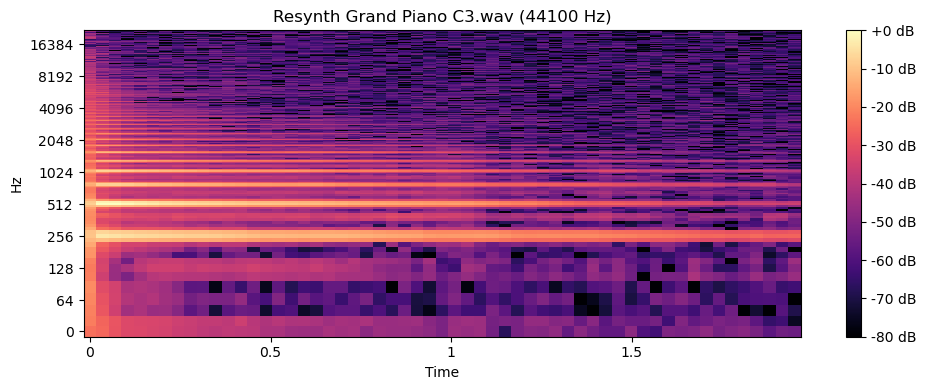

total=583 sec, epoch=211 (2.8 sec/epoch), train=1150.0157 (0.55%), test=1216.9078 (-0.69%), overfit=1.06
total=588 sec, epoch=213 (2.8 sec/epoch), train=1145.2428 (-0.16%), test=1203.9321 (-1.50%), overfit=1.05
total=594 sec, epoch=215 (2.8 sec/epoch), train=1144.5824 (0.20%), test=1216.3608 (-0.57%), overfit=1.06
total=599 sec, epoch=217 (2.8 sec/epoch), train=1142.2956 (0.16%), test=1217.3507 (1.13%), overfit=1.07
total=605 sec, epoch=219 (2.8 sec/epoch), train=1136.5036 (-0.56%), test=1211.7262 (-0.80%), overfit=1.07
total=610 sec, epoch=221 (2.8 sec/epoch), train=1128.9216 (-0.66%), test=1212.9698 (0.38%), overfit=1.07
total=616 sec, epoch=223 (2.8 sec/epoch), train=1134.9466 (-0.08%), test=1210.8596 (0.79%), overfit=1.07
total=621 sec, epoch=225 (2.8 sec/epoch), train=1137.3970 (0.73%), test=1228.3000 (1.72%), overfit=1.08
total=627 sec, epoch=227 (2.8 sec/epoch), train=1128.8773 (0.07%), test=1219.6239 (1.66%), overfit=1.08
total=632 sec, epoch=229 (2.8 sec/epoch), train=1122.678

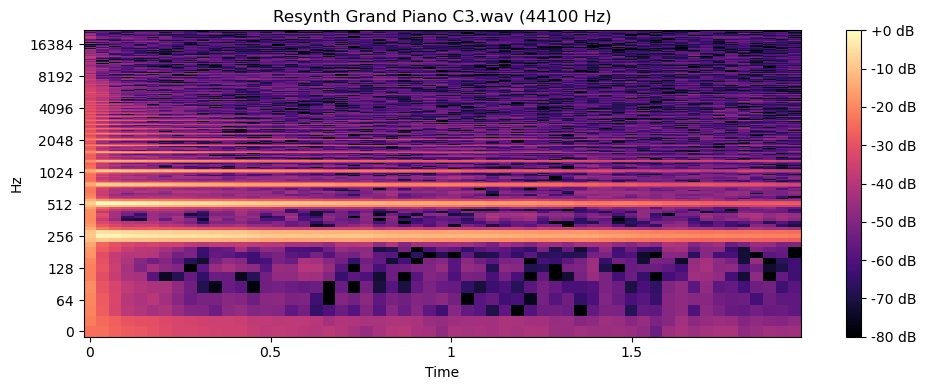

total=726 sec, epoch=263 (2.8 sec/epoch), train=1085.2707 (-0.32%), test=1227.9559 (0.02%), overfit=1.13
total=732 sec, epoch=265 (2.8 sec/epoch), train=1093.3955 (0.33%), test=1219.3068 (-0.35%), overfit=1.12
total=737 sec, epoch=267 (2.8 sec/epoch), train=1084.9105 (0.45%), test=1236.5948 (1.59%), overfit=1.14
total=742 sec, epoch=269 (2.8 sec/epoch), train=1086.3986 (0.28%), test=1223.5862 (0.64%), overfit=1.13


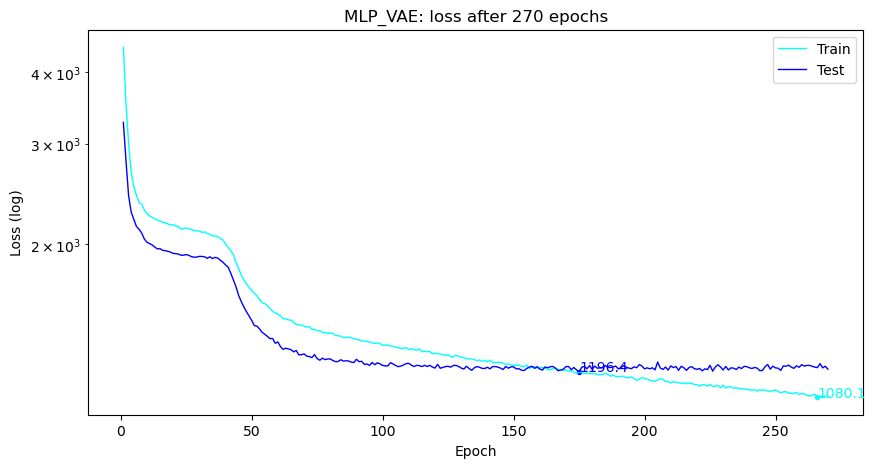

total=747 sec, epoch=271 (2.8 sec/epoch), train=1078.2547 (-0.22%), test=1240.8372 (2.60%), overfit=1.15
total=753 sec, epoch=273 (2.8 sec/epoch), train=1078.9013 (-0.59%), test=1227.4058 (0.33%), overfit=1.14
total=758 sec, epoch=275 (2.8 sec/epoch), train=1078.9584 (-0.00%), test=1235.0624 (-0.69%), overfit=1.14
total=763 sec, epoch=277 (2.8 sec/epoch), train=1080.1049 (0.03%), test=1231.3415 (-0.55%), overfit=1.14
total=768 sec, epoch=279 (2.8 sec/epoch), train=1073.6867 (-0.36%), test=1226.0335 (0.24%), overfit=1.14
total=773 sec, epoch=281 (2.8 sec/epoch), train=1079.8959 (0.25%), test=1219.0487 (-1.26%), overfit=1.13
total=779 sec, epoch=283 (2.8 sec/epoch), train=1068.7175 (0.13%), test=1234.1801 (1.27%), overfit=1.15
total=784 sec, epoch=285 (2.8 sec/epoch), train=1071.6564 (0.17%), test=1232.0482 (1.50%), overfit=1.15
total=789 sec, epoch=287 (2.7 sec/epoch), train=1063.8257 (-0.40%), test=1214.1897 (-1.66%), overfit=1.14
total=794 sec, epoch=289 (2.7 sec/epoch), train=1067.01

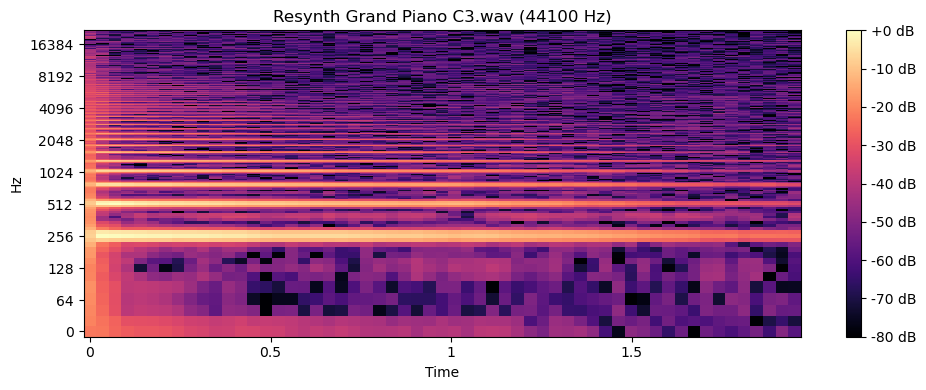

total=884 sec, epoch=323 (2.7 sec/epoch), train=1035.6445 (0.61%), test=1240.8182 (0.23%), overfit=1.20
total=889 sec, epoch=325 (2.7 sec/epoch), train=1035.6554 (0.46%), test=1231.5210 (-1.11%), overfit=1.19
total=894 sec, epoch=327 (2.7 sec/epoch), train=1026.4462 (0.18%), test=1239.0653 (0.26%), overfit=1.21
total=900 sec, epoch=329 (2.7 sec/epoch), train=1024.7563 (-0.25%), test=1244.5208 (0.09%), overfit=1.21
total=905 sec, epoch=331 (2.7 sec/epoch), train=1027.8358 (-0.01%), test=1235.2297 (-0.12%), overfit=1.20
total=910 sec, epoch=333 (2.7 sec/epoch), train=1024.1873 (0.31%), test=1232.3744 (-0.66%), overfit=1.20
total=915 sec, epoch=335 (2.7 sec/epoch), train=1029.3534 (0.82%), test=1249.2230 (1.54%), overfit=1.21
total=921 sec, epoch=337 (2.7 sec/epoch), train=1024.0646 (0.04%), test=1238.9729 (-0.57%), overfit=1.21
total=926 sec, epoch=339 (2.7 sec/epoch), train=1024.7376 (0.16%), test=1244.9688 (0.82%), overfit=1.21
total=931 sec, epoch=341 (2.7 sec/epoch), train=1024.2678 

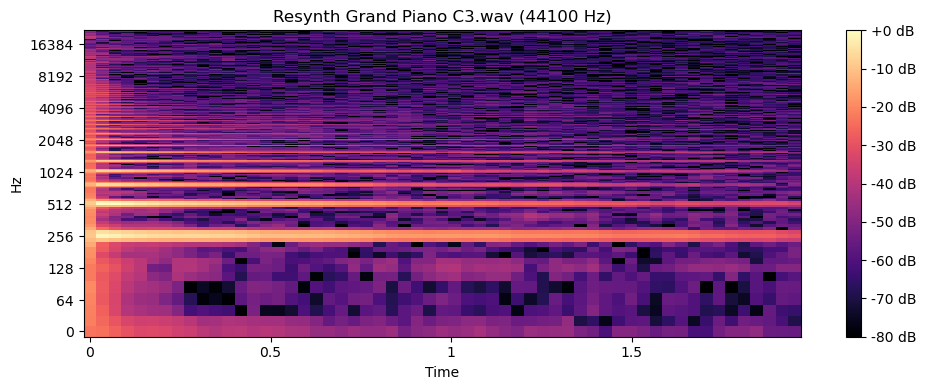

total=1048 sec, epoch=385 (2.7 sec/epoch), train=977.3466 (0.10%), test=1240.0518 (-0.39%), overfit=1.27
total=1053 sec, epoch=387 (2.7 sec/epoch), train=974.0045 (-0.21%), test=1231.4550 (-0.49%), overfit=1.26
total=1058 sec, epoch=389 (2.7 sec/epoch), train=973.6719 (-0.75%), test=1246.0208 (-1.30%), overfit=1.28
total=1063 sec, epoch=391 (2.7 sec/epoch), train=972.2366 (-0.04%), test=1242.9957 (0.18%), overfit=1.28
total=1069 sec, epoch=393 (2.7 sec/epoch), train=975.9380 (0.75%), test=1246.9048 (0.99%), overfit=1.28
total=1074 sec, epoch=395 (2.7 sec/epoch), train=969.9787 (-0.39%), test=1264.4684 (1.80%), overfit=1.30
total=1079 sec, epoch=397 (2.7 sec/epoch), train=969.2490 (0.21%), test=1242.7200 (-0.62%), overfit=1.28
total=1085 sec, epoch=399 (2.7 sec/epoch), train=966.0024 (-0.41%), test=1253.9728 (-0.58%), overfit=1.30
total=1090 sec, epoch=401 (2.7 sec/epoch), train=964.7645 (-0.09%), test=1246.6408 (-0.48%), overfit=1.29
total=1095 sec, epoch=403 (2.7 sec/epoch), train=959

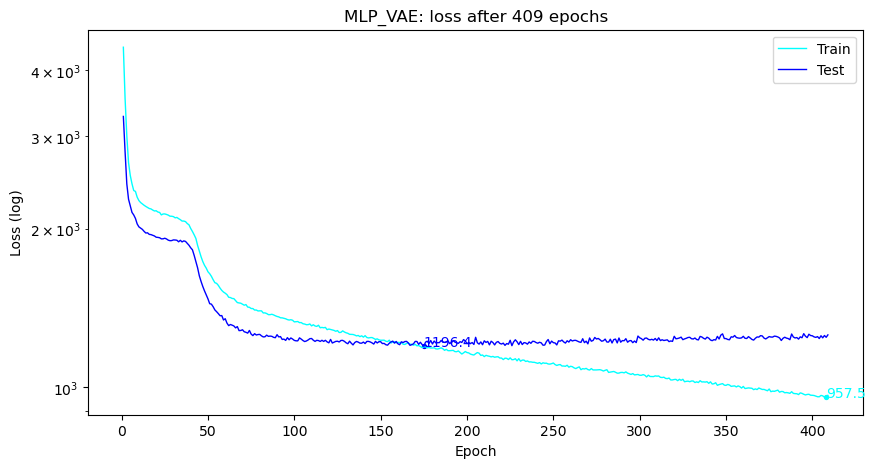

total=1111 sec, epoch=409 (2.7 sec/epoch), train=965.4701 (0.83%), test=1257.6023 (1.06%), overfit=1.30
total=1116 sec, epoch=411 (2.7 sec/epoch), train=958.6542 (0.09%), test=1248.5972 (-1.26%), overfit=1.30
total=1122 sec, epoch=413 (2.7 sec/epoch), train=954.3493 (-0.31%), test=1247.3570 (0.21%), overfit=1.31
total=1127 sec, epoch=415 (2.7 sec/epoch), train=953.6107 (0.08%), test=1241.6480 (0.70%), overfit=1.30
total=1132 sec, epoch=417 (2.7 sec/epoch), train=940.5465 (-1.41%), test=1244.6224 (0.19%), overfit=1.32
total=1137 sec, epoch=419 (2.7 sec/epoch), train=947.8354 (0.09%), test=1243.4909 (-0.52%), overfit=1.31
total=1143 sec, epoch=421 (2.7 sec/epoch), train=949.7659 (0.08%), test=1247.8821 (0.11%), overfit=1.31
total=1148 sec, epoch=423 (2.7 sec/epoch), train=941.8004 (-0.48%), test=1250.7571 (-0.46%), overfit=1.33
total=1153 sec, epoch=425 (2.7 sec/epoch), train=940.4004 (-0.49%), test=1246.4076 (-1.22%), overfit=1.33
total=1158 sec, epoch=427 (2.7 sec/epoch), train=940.323

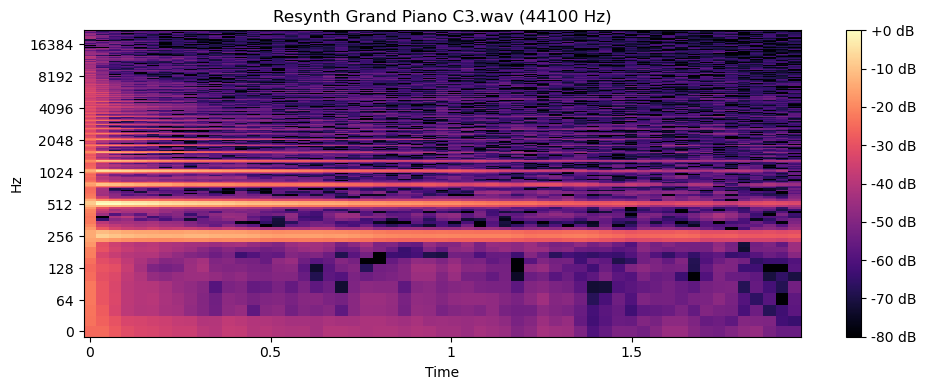

total=1206 sec, epoch=445 (2.7 sec/epoch), train=930.5235 (0.49%), test=1246.0085 (-1.51%), overfit=1.34
total=1211 sec, epoch=447 (2.7 sec/epoch), train=923.1078 (0.26%), test=1254.9210 (0.08%), overfit=1.36
total=1216 sec, epoch=449 (2.7 sec/epoch), train=922.8551 (0.20%), test=1256.9474 (0.37%), overfit=1.36
total=1222 sec, epoch=451 (2.7 sec/epoch), train=916.3092 (-1.32%), test=1266.2589 (0.84%), overfit=1.38
total=1227 sec, epoch=453 (2.7 sec/epoch), train=921.1281 (0.68%), test=1250.9848 (0.31%), overfit=1.36
total=1232 sec, epoch=455 (2.7 sec/epoch), train=918.1955 (-0.04%), test=1258.8598 (-0.17%), overfit=1.37
total=1237 sec, epoch=457 (2.7 sec/epoch), train=916.3728 (0.24%), test=1240.8964 (-1.65%), overfit=1.35
total=1243 sec, epoch=459 (2.7 sec/epoch), train=910.0651 (-0.77%), test=1275.2115 (3.14%), overfit=1.40
total=1248 sec, epoch=461 (2.7 sec/epoch), train=917.4128 (0.56%), test=1267.0806 (0.95%), overfit=1.38
total=1253 sec, epoch=463 (2.7 sec/epoch), train=909.2524 

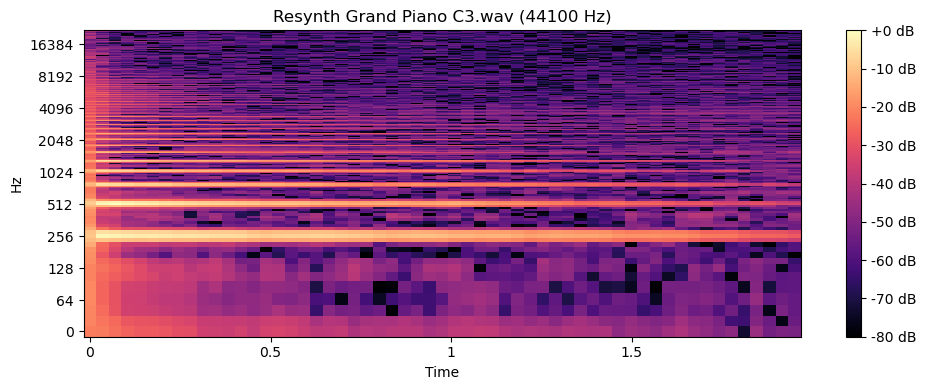

total=1358 sec, epoch=503 (2.7 sec/epoch), train=873.6391 (-0.68%), test=1258.9506 (-0.09%), overfit=1.44
total=1364 sec, epoch=505 (2.7 sec/epoch), train=887.8904 (0.90%), test=1266.8554 (0.56%), overfit=1.43
total=1369 sec, epoch=507 (2.7 sec/epoch), train=881.2444 (-0.54%), test=1250.1467 (-0.65%), overfit=1.42
total=1374 sec, epoch=509 (2.7 sec/epoch), train=878.3995 (0.42%), test=1256.7550 (0.44%), overfit=1.43
total=1379 sec, epoch=511 (2.7 sec/epoch), train=875.9318 (0.63%), test=1257.6473 (-1.08%), overfit=1.44
total=1385 sec, epoch=513 (2.7 sec/epoch), train=877.6737 (0.39%), test=1262.7229 (0.05%), overfit=1.44
total=1390 sec, epoch=515 (2.7 sec/epoch), train=874.2717 (0.04%), test=1267.7275 (0.71%), overfit=1.45
total=1395 sec, epoch=517 (2.7 sec/epoch), train=874.2561 (-0.41%), test=1263.4871 (-0.25%), overfit=1.45
total=1401 sec, epoch=519 (2.7 sec/epoch), train=867.6291 (0.04%), test=1259.6764 (0.22%), overfit=1.45
total=1406 sec, epoch=521 (2.7 sec/epoch), train=866.7673

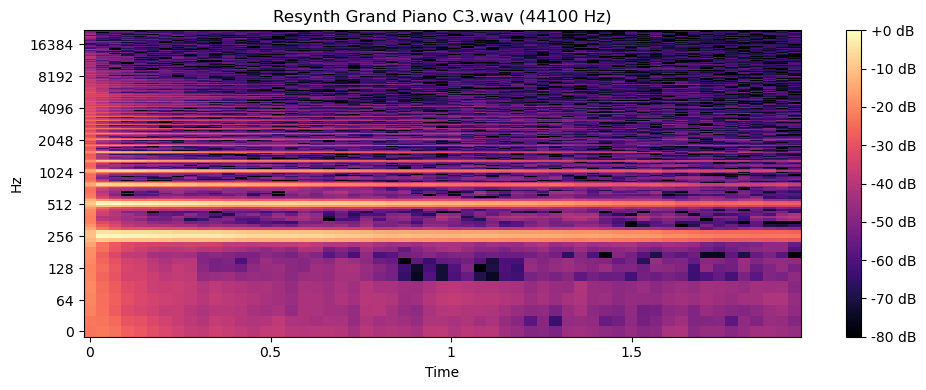

total=1527 sec, epoch=567 (2.7 sec/epoch), train=834.2321 (-0.60%), test=1258.2521 (-0.94%), overfit=1.51
total=1532 sec, epoch=569 (2.7 sec/epoch), train=833.2502 (-1.06%), test=1253.3746 (-2.54%), overfit=1.50
total=1538 sec, epoch=571 (2.7 sec/epoch), train=836.1755 (0.20%), test=1259.3825 (0.05%), overfit=1.51
total=1543 sec, epoch=573 (2.7 sec/epoch), train=835.0110 (0.09%), test=1268.1357 (0.09%), overfit=1.52
total=1548 sec, epoch=575 (2.7 sec/epoch), train=834.0047 (-0.13%), test=1285.2976 (1.99%), overfit=1.54
total=1553 sec, epoch=577 (2.7 sec/epoch), train=830.0749 (0.22%), test=1277.0757 (1.21%), overfit=1.54
total=1559 sec, epoch=579 (2.7 sec/epoch), train=826.5963 (-0.97%), test=1280.8850 (0.91%), overfit=1.55
total=1564 sec, epoch=581 (2.7 sec/epoch), train=831.9162 (-0.02%), test=1267.7817 (-1.64%), overfit=1.52
total=1569 sec, epoch=583 (2.7 sec/epoch), train=829.2679 (0.11%), test=1279.9824 (0.79%), overfit=1.54
total=1574 sec, epoch=585 (2.7 sec/epoch), train=821.492

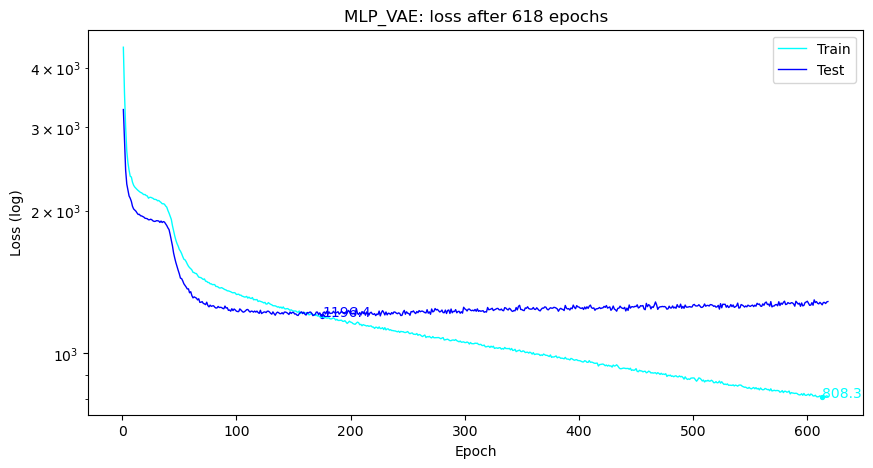

total=1665 sec, epoch=619 (2.7 sec/epoch), train=806.0939 (-0.58%), test=1277.1882 (-0.72%), overfit=1.58
total=1670 sec, epoch=621 (2.7 sec/epoch), train=803.6941 (-0.88%), test=1274.4296 (-0.33%), overfit=1.59


In [ ]:
# Find out the best hyper-parameters to train this model (typically needs to run overnight)
#model = "StepWiseMLP" # or "RNNAutoEncoder" and RNN_VAE_Incremental", or "StepWiseMLP" and "MLPVAE_Incremental"


#model = "RNNAutoEncoder"

model = "MLP_VAE"
#model = "StepWiseMLP"
#model = "MLPVAE_Incremental"

#model = "RNN_VAE"

#model = "STFT_VAE"

# First optimise the hyper-parameters for this model
#optimise_hyper_parameters(model)

# Then train using the best hyper-parameters
train_best_params(model)


# Alternatively, refine the training for the best set of hyper-parameters we've found


In [ ]:
# Test and Generate new samples
from Generate import *

use_model(model)

# Test the accuracy of the model: lists all samples by decreasing accuracy
test_all()

# Print some pretty pictures of the samples and their encodings
demo_all()



